In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
variable = "T2MIN"
summary_df = pd.read_csv(f"output/summary_{variable}.csv")
summary_df

,init_month,lead,p33,p50,p66
0,1,1,-0.069430,0.024475,0.138100
1,1,2,-0.047726,0.050489,0.192386
2,1,3,-0.063299,0.033153,0.088533
3,1,4,-0.020790,0.096086,0.198382
4,1,5,0.009901,0.090512,0.198591
...,...,...,...,...,...
67,12,2,-0.162224,-0.040712,0.124730
68,12,3,-0.031864,0.117767,0.167573
69,12,4,-0.117032,0.038529,0.134185
70,12,5,-0.109607,0.011520,0.098086


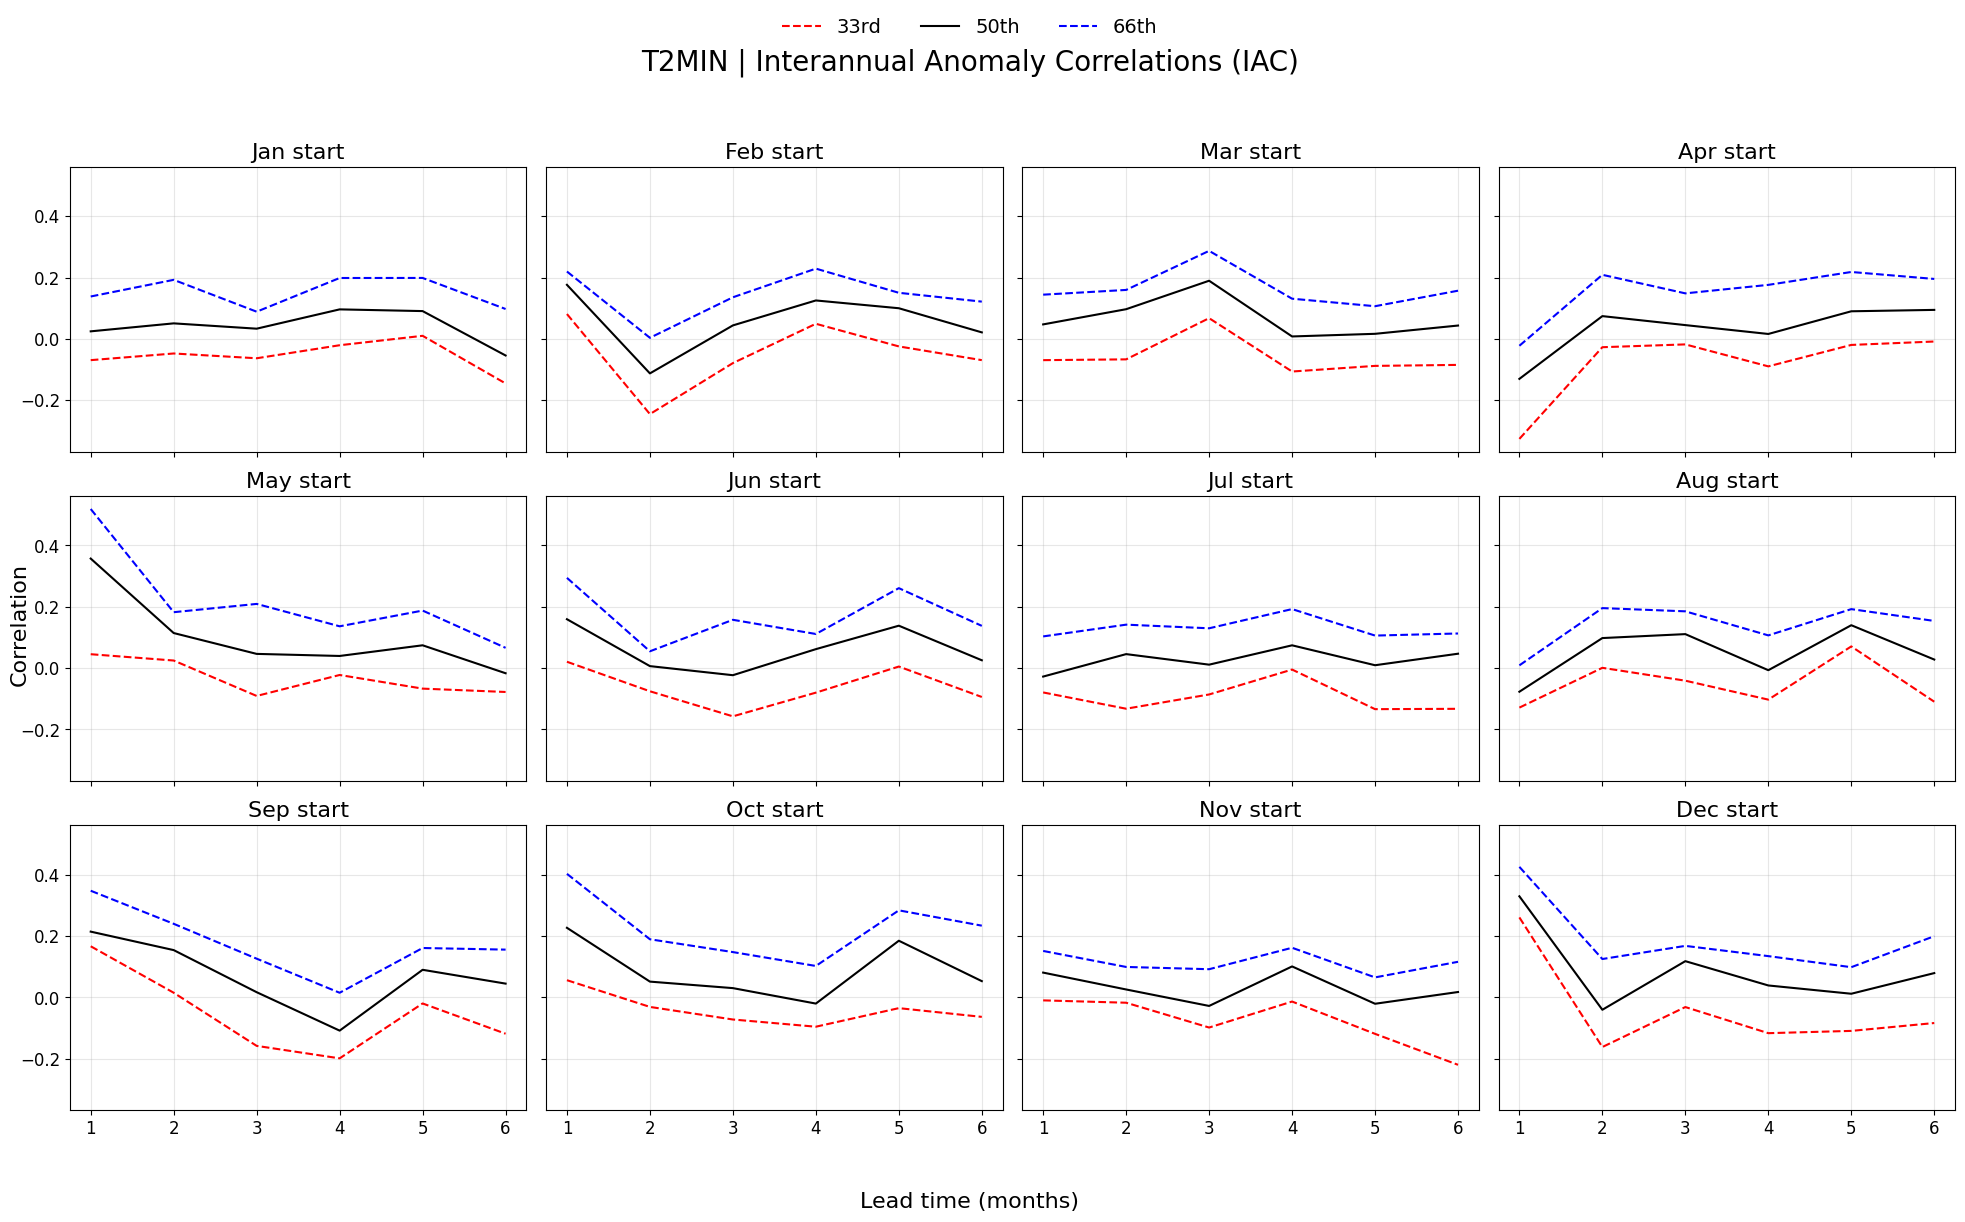

In [11]:
# Map month numbers to short names
month_map = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May",
             6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct",
             11:"Nov", 12:"Dec"}

fig, axes = plt.subplots(3, 4, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, month in enumerate(sorted(summary_df['init_month'].unique())):
    ax = axes[i]
    df_month = summary_df[summary_df['init_month'] == month]
    
    lead_times = df_month['lead']
    
    ax.plot(lead_times, df_month['p33'], label='33rd', color='red', linestyle='--')
    ax.plot(lead_times, df_month['p50'], label='50th', color='black', linestyle='-')
    ax.plot(lead_times, df_month['p66'], label='66th', color='blue', linestyle='--')
    
    ax.set_title(f"{month_map[month]} start", fontsize=16)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Common labels
fig.suptitle(f"{variable} | Interannual Anomaly Correlations (IAC)", fontsize=20)
fig.supxlabel("Lead time (months)", fontsize=16)
fig.supylabel("Correlation", fontsize=16)

# Single legend at the top
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02),
           ncol=3, frameon=False, fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\Meteo\AppData\Local\Temp\ipykernel_9928\2215447717.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", n_months)


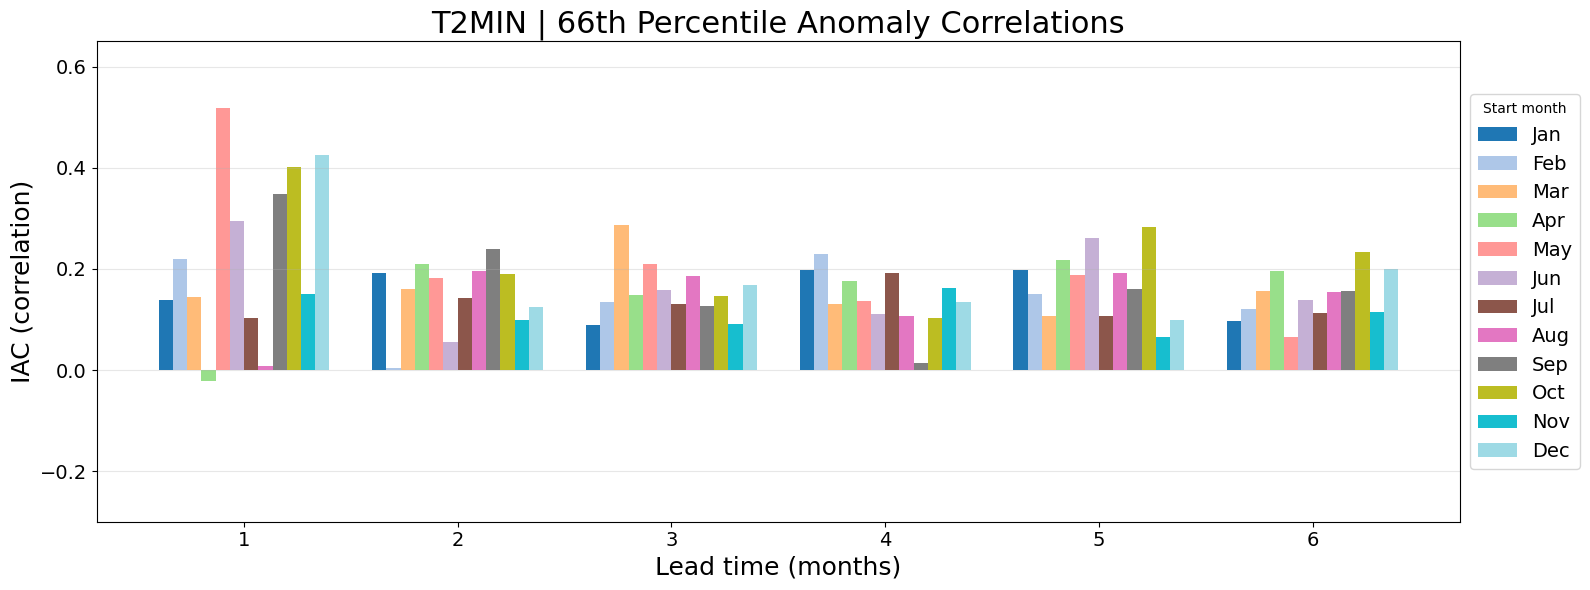

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Map month numbers to short names
month_map = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May",
             6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct",
             11:"Nov", 12:"Dec"}

# Plot the 66th percentile as grouped bar chart vs lead time
fig, ax = plt.subplots(figsize=(16, 6))

months = sorted(summary_df['init_month'].unique())
n_months = len(months)
lead_times = sorted(summary_df['lead'].unique())
x = np.arange(len(lead_times))
width = 0.8 / n_months

cmap = plt.cm.get_cmap("tab20", n_months)

for i, m in enumerate(months):
    df_m = summary_df[summary_df['init_month'] == m].sort_values('lead')
    values = df_m['p66'].values
    
    ax.bar(
        x + i*width - (n_months-1)*width/2,
        values,
        width=width,
        label=month_map.get(m, m),
        color=cmap(i)
    )

ax.set_title(f"{variable} | 66th Percentile Anomaly Correlations", fontsize=22)
ax.set_xlabel("Lead time (months)", fontsize=18)
ax.set_ylabel("IAC (correlation)", fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(lead_times, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.grid(True, axis="y", alpha=0.3)
ax.set_ylim(-0.3, 0.65)

ax.legend(
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=14,
    title="Start month"
)

plt.tight_layout()
plt.show()
